# TOPIC: Analysis of Household Power Consumption in Gyalpozhing
## Group 6
1. Anisha Rai (12190041)
2. Rashmi Gurung (12190072)
3. Sonam Dema (12190081)
4. Tashi Namgay (12190086)

#1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
from matplotlib import pyplot as plt


#2. LOAD DATA

In [2]:
#Load data

main_df = pd.read_excel('Gyalpozhing_household_power_consumption.XLSX')
main_df.head()

,BP Number,BP_name,CA_number,portion,posting_Date,Due Date,Billing Period,Print Doc. No.,Billing Doc. No.,consumption,...,current,voltage,energy_Charges,Demand Charges,Penalty Charges,Recon Key,G/L Account,Category,FICA Doument no,Search term1
0,1702371.0,Company Lemon Grass Factory Kurizampa,50000504.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,167.0,...,1.166136,234.0,589.51,0.0,0.00,19015R040045,300002,LV Agricultural,4.000049e+11,LEMON FACTORY
1,1705727.0,Company RBA Gyelposhing,50001004.0,P17_41,2019-01-02,2019-02-01,2019/01,4.003612e+09,9.018221e+09,788.0,...,5.502486,234.0,2781.64,0.0,0.00,190115R4/17,300002,LV Agricultural,9.434803e+07,"RAMS, GYELPOSHING"
2,1702588.0,N R D C Gyelposhing,60001500.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,N R D C
3,1702586.0,Swerage Treatment Plant,60000307.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,SWERAGE PLANT
4,1709983.0,Company Rabsel Construction Pvt.Ltd Gyelposhing,60006107.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,1880.0,...,13.127758,234.0,7557.60,0.0,463.18,19015R040045,300003,LV Bulk,4.000049e+11,RABSEL CONSTRUCTION


# 3. DATA PREPROCESSING 

In [3]:
# Creating a new dataframe with the only required attributes:

df = pd.DataFrame(main_df,columns=['Category','portion','posting_Date','current','voltage','consumption','energy_Charges'])
df.tail()

,Category,portion,posting_Date,current,voltage,consumption,energy_Charges
25377,LV Urban Domestic Customers,P17_40,2022-03-02,3.505391,234.0,502.0,1207.28
25378,MV Industrial,P17_41,2022-03-02,830.316742,234.0,118908.0,315106.20
25379,LV Bulk,P17_41,2022-03-16,0.000000,234.0,0.0,0.00
25380,NaN,NaN,NaT,NaN,NaN,NaN,NaN
25381,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

Category          2
portion           2
posting_Date      2
current           2
voltage           2
consumption       2
energy_Charges    2
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

Category          0
portion           0
posting_Date      0
current           0
voltage           0
consumption       0
energy_Charges    0
dtype: int64

In [6]:
df.dtypes

Category                  object
portion                   object
posting_Date      datetime64[ns]
current                  float64
voltage                  float64
consumption              float64
energy_Charges           float64
dtype: object

In [7]:
# Selecting the data from 2019 till 2021 only:

df = df.loc[(df['posting_Date'] >= '01-01-2019') & (df['posting_Date'] < '01-01-2022')]
df.tail()

,Category,portion,posting_Date,current,voltage,consumption,energy_Charges
23602,LV Urban Domestic Customers,P17_41,2021-12-02,0.796045,234.0,114.0,165.52
23603,LV Urban Domestic Customers,P17_41,2021-12-02,1.529244,234.0,219.0,446.92
23604,LV Urban Domestic Customers,P17_41,2021-12-02,0.628457,234.0,90.0,115.20
23605,LV Urban Domestic Customers,P17_41,2021-12-02,0.733199,234.0,105.0,141.40
23606,LV Urban Domestic Customers,P17_41,2021-12-02,0.279314,234.0,40.0,51.20


In [8]:
# Extracting the year and montht from the posting_date
# Adding these two new columns(Year and month) and then droping the posting date col

df['Year'] = pd.to_datetime(df['posting_Date']).dt.year
df['Month'] = pd.to_datetime(df['posting_Date']).dt.month
df = df.drop(['posting_Date'], axis = 1)

In [9]:
df.duplicated().sum()

5952

In [10]:
gyalpozhing_df = df.drop_duplicates()

In [11]:
gyalpozhing_df.dtypes

Category           object
portion            object
current           float64
voltage           float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

# 4. DETECTING OUTLIERS

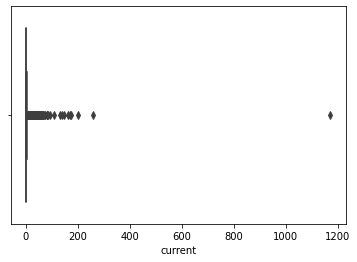

In [12]:
sns.boxplot(x = gyalpozhing_df['current'])
plt.show()

In [13]:
#ul = upper limit
#ll = lower limit
#IQR = Interquartile Range

q1 = gyalpozhing_df.current.quantile(0.25)
q3 = gyalpozhing_df.current.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [14]:
gyalpozhing_df[(gyalpozhing_df.current < ll)  | (gyalpozhing_df.current > ul)]

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
1,LV Agricultural,P17_41,5.502486,234.0,788.0,2781.64,2019,1
4,LV Bulk,P17_41,13.127758,234.0,1880.0,7557.60,2019,1
5,LV Bulk,P17_41,48.600637,234.0,6960.0,27979.20,2019,1
7,LV Bulk,P17_41,7.262164,234.0,1040.0,4180.80,2019,1
8,LV Bulk,P17_41,10.048321,234.0,1439.0,5784.78,2019,1
...,...,...,...,...,...,...,...,...
23469,LV Urban Domestic Customers,P17_41,11.668343,234.0,1671.0,5462.44,2021,12
23523,LV Urban Domestic Customers,P17_41,5.816714,234.0,833.0,2412.12,2021,12
23583,LV Urban Domestic Customers,P17_41,7.422770,234.0,1063.0,3249.32,2021,12
23584,LV Urban Domestic Customers,P17_41,8.100106,234.0,1160.0,3602.40,2021,12


In [15]:
df1 = gyalpozhing_df[(gyalpozhing_df.current > ll) & (gyalpozhing_df.current < ul)]
df1.shape

(16039, 8)

<function matplotlib.pyplot.show>

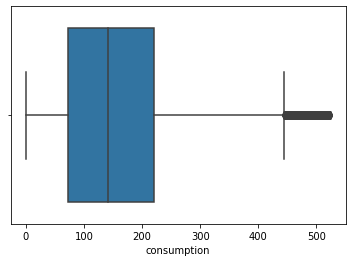

In [16]:
sns.boxplot(x = df1['consumption'])
plt.show

In [17]:
q1 = df1.consumption.quantile(0.25)
q3 = df1.consumption.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [18]:
df1[(df1.consumption < ll)  | (df1.consumption > ul)]

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
40,LV Commercial,P17_41,3.568236,234.0,511.0,1803.83,2019,1
52,LV Commercial,P17_41,3.456511,234.0,495.0,1747.35,2019,1
79,LV Institutional,P17_41,3.638065,234.0,521.0,1839.13,2019,1
81,LV Institutional,P17_41,3.631082,234.0,520.0,1835.60,2019,1
97,LV Institutional,P17_41,3.421597,234.0,490.0,1729.70,2019,1
...,...,...,...,...,...,...,...,...
23346,LV Urban Domestic Customers,P17_41,3.477459,234.0,498.0,1194.64,2021,12
23394,LV Urban Domestic Customers,P17_40,3.526339,234.0,505.0,1218.20,2021,12
23401,LV Urban Domestic Customers,P17_41,3.484442,234.0,499.0,1197.32,2021,12
23484,LV Urban Domestic Customers,P17_41,3.386682,234.0,485.0,1159.80,2021,12


In [19]:
df2 = df1[(df1.consumption > ll) & (df1.consumption < ul)]
df2.shape

(15663, 8)

<function matplotlib.pyplot.show>

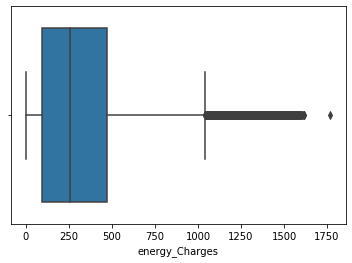

In [20]:
sns.boxplot(x = df2['energy_Charges'])
plt.show

In [21]:
q1 = df2.energy_Charges.quantile(0.25)
q3 = df2.energy_Charges.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [22]:
df2[(df2.energy_Charges < ll)  | (df2.energy_Charges > ul)]

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
15,LV Commercial,P17_41,3.037540,234.0,435.0,1535.55,2019,1
25,LV Commercial,P17_41,2.953746,234.0,423.0,1493.19,2019,1
31,LV Commercial,P17_41,2.918831,234.0,418.0,1475.54,2019,1
41,LV Commercial,P17_41,2.890900,234.0,414.0,1461.42,2019,1
45,LV Commercial,P17_41,2.800123,234.0,401.0,1415.53,2019,1
...,...,...,...,...,...,...,...,...
23150,LV Temporary,P17_41,2.234512,234.0,320.0,1164.80,2021,12
23151,LV Temporary,P17_41,2.667449,234.0,382.0,1390.48,2021,12
23154,LV Temporary,P17_41,2.430032,234.0,348.0,1266.72,2021,12
23163,LV Temporary,P17_41,3.100385,234.0,444.0,1616.16,2021,12


In [23]:
df3 = df2[(df2.energy_Charges > ll) & (df2.energy_Charges < ul)]
df3.shape

(15062, 8)

In [24]:
df3.dtypes

Category           object
portion            object
current           float64
voltage           float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

# 6. LABEL ENCODING

In [25]:
df3.tail()

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
23596,LV Urban Domestic Customers,P17_41,1.047428,234.0,150.0,262.00,2021,12
23601,LV Urban Domestic Customers,P17_41,1.585107,234.0,227.0,468.36,2021,12
23603,LV Urban Domestic Customers,P17_41,1.529244,234.0,219.0,446.92,2021,12
23604,LV Urban Domestic Customers,P17_41,0.628457,234.0,90.0,115.20,2021,12
23606,LV Urban Domestic Customers,P17_41,0.279314,234.0,40.0,51.20,2021,12


In [26]:
# unique values in each columns
for x in df3.columns:
    #prinfting unique values
    print(x ,':', len(df3[x].unique()))

Category : 12
portion : 2
current : 1845
voltage : 1
consumption : 1845
energy_Charges : 3170
Year : 3
Month : 12


In [27]:
df3['Category'].value_counts()

LV Urban Domestic Customers             10699
LV Rural Domestic Customers              1412
LV Commercial                            1257
LV Institutional                          821
LV Temporary                              306
LV Rural-Community Lhakhangs              217
LV Religious Institution customers        158
LV Street light                            63
LV Bulk                                    40
LV Agricultural                            33
LV Power house                             31
LV Rural-cooperativs and Agriculture       25
Name: Category, dtype: int64

In [28]:
categorical_features= df3.select_dtypes(include = ['object'])
categorical_features

,Category,portion
0,LV Agricultural,P17_41
2,LV Bulk,P17_41
10,LV Commercial,P17_41
11,LV Commercial,P17_41
13,LV Commercial,P17_41
...,...,...
23596,LV Urban Domestic Customers,P17_41
23601,LV Urban Domestic Customers,P17_41
23603,LV Urban Domestic Customers,P17_41
23604,LV Urban Domestic Customers,P17_41


In [29]:
categorical_features.isna().sum()

Category    0
portion     0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# categorical_data = le.fit_transform(categorical_features)

df3['Category'] = le.fit_transform(categorical_features['Category'])
df3['portion'] = le.fit_transform(categorical_features['portion'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 7. TRAIN AND TEST SPLIT




In [31]:
# Input:
X = df3[['Year','Month','consumption','Category','portion']]

# Output:
y = df3['energy_Charges']

In [32]:
#SPLITING

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [33]:
X_test.head()

,Year,Month,consumption,Category,portion
20057,2021,7,216.0,11,0
6901,2020,1,306.0,11,0
17764,2021,4,167.0,11,0
16828,2021,3,47.0,6,1
14444,2020,11,65.0,11,1


In [34]:
y_test.head()

20057    438.88
6901     680.08
17764    307.56
16828      0.00
14444     83.20
Name: energy_Charges, dtype: float64

#7.1: Linear Regression Algorithm

In [35]:
# TRAINING REGRESSION MODEL

from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [36]:
# PREDICTION

y_pred_LR = LR_model.predict(X_test)
#y_pred_LR

In [37]:
from sklearn import metrics
from sklearn.metrics import r2_score

LR_MAE = metrics.mean_absolute_error(y_test, y_pred_LR)
LR_MSE = metrics.mean_squared_error(y_test, y_pred_LR)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))
LR_R2 = r2_score(y_test,y_pred_LR)
print('Mean Absolute Error:', LR_MAE)
print('MSE: ', LR_MSE)
print('Root Mean Squared Error:', LR_RMSE)
print('Root Mean Squared Error: ', LR_R2)

Mean Absolute Error: 48.93470478803732
MSE:  6846.411827513629
Root Mean Squared Error: 82.74304700404517
Root Mean Squared Error:  0.8868973747465826


In [38]:
LR_model.intercept_

553.5560662338835

In [39]:
LR_model.coef_

array([ -0.22498456,   0.36717131,   2.55924168, -18.36679922,
       -10.77590632])

In [40]:
# REGRESSION MODEL EVALUTION

Y_train_predicted_LR = LR_model.predict(X_train)
Y_test_predicted_LR = LR_model.predict(X_test)
LR_train_accuracy = r2_score(y_train,Y_train_predicted_LR)
LR_test_accuracy = r2_score(y_test,Y_test_predicted_LR)  
print("Train set accuracy of regression model: ",LR_train_accuracy)
print("Test set accuracy of regression model: ",LR_test_accuracy)

Train set accuracy of regression model:  0.8897343305146604
Test set accuracy of regression model:  0.8868973747465826


In [41]:
LR_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_LR})
LR_Result.head()

,Actual Consumption,Predicted Consumption
20057,438.88,452.193880
6901,680.08,680.547588
17764,307.56,325.689524
16828,0.00,99.271441
14444,83.20,56.666150


In [42]:
LR_model.predict([[2021,10,165.0,11,0]])
# LR_model.predict([[2021,10,165.0,11]])
# LR_model.predict([[165.0]])
# LR_model.predict([[2021,10,165.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([322.7740683])

# 7.2: RANDOM FOREST ALGORITHM

In [43]:
# TRAINING RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=200)
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [44]:
#PREDICTION

y_pred_RF = RF_model.predict(X_test)
#y_pred_RF

In [45]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

RF_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
RF_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
RF_R2 = r2_score(y_test,y_pred_RF)
print('Mean Absolute Error:', RF_MAE)
print('MSE: ', RF_MSE)
print('Root Mean Squared Error:', RF_RMSE)
print('R2 Score: ', RF_R2)

Mean Absolute Error: 0.9647239245886948
MSE:  35.82480349668844
Root Mean Squared Error: 5.985382485412978
R2 Score:  0.9994081747597507


In [46]:
# EVALUTION 

Y_train_predicted_RF = RF_model.predict(X_train)
Y_test_predicted_RF = RF_model.predict(X_test)
RF_train_accuracy = r2_score(y_train,Y_train_predicted_RF)
RF_test_accuracy = r2_score(y_test,Y_test_predicted_RF)
print("Train set accuracy of RandomForest model: ",RF_train_accuracy)
print("Test set accuracy of RandomForest model: ",RF_test_accuracy)

Train set accuracy of RandomForest model:  0.9998992577748732
Test set accuracy of RandomForest model:  0.9994081747597507


In [47]:
RF_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_RF})
RF_Result.head()

,Actual Consumption,Predicted Consumption
20057,438.88,438.87895
6901,680.08,680.12520
17764,307.56,307.56000
16828,0.00,0.00000
14444,83.20,83.20000


In [48]:
RF_model.predict([[2021,10,165.0,11,0]])
# RF_model.predict([[2021,10,165.0,11]])
# RF_model.predict([[165.0]])
# RF_model.predict([[2021,10,165.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([302.2])

# 7.3: DECISION TREE

In [49]:
#TRAIN

from sklearn.tree import DecisionTreeRegressor

In [50]:
DT_model = DecisionTreeRegressor(max_depth=5)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [51]:
# PREDICT

y_pred_DT = DT_model.predict(X_test)
#y_pred_DT

In [52]:
from sklearn.metrics import r2_score
import numpy as np

DT_MAE = metrics.mean_absolute_error(y_test, y_pred_DT)
DT_MSE = metrics.mean_squared_error(y_test, y_pred_DT)
DT_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT))
DT_R2 = r2_score(y_test,y_pred_DT)
print('Mean Absolute Error:', DT_MAE)
print('MSE: ', DT_MSE)
print('Root Mean Squared Error:', DT_RMSE)
print("R2 score : ", DT_R2)

Mean Absolute Error: 27.46474034709717
MSE:  2149.9088237153046
Root Mean Squared Error: 46.36710928789183
R2 score :  0.9644835370492174


In [53]:
# EVALUTION 

Y_train_predicted_DT = DT_model.predict(X_train)
Y_test_predicted_DT = DT_model.predict(X_test)
DT_train_accuracy = r2_score(y_train,Y_train_predicted_DT)
DT_test_accuracy = r2_score(y_test,Y_test_predicted_DT)
print("Train set accuracy of DecisionTree model: ",DT_train_accuracy)
print("Test set accuracy of DecisionTree model: ",DT_test_accuracy)

Train set accuracy of DecisionTree model:  0.969022868696035
Test set accuracy of DecisionTree model:  0.9644835370492174


In [54]:
DT_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_DT})
DT_Result.head()

,Actual Consumption,Predicted Consumption
20057,438.88,389.334763
6901,680.08,717.129516
17764,307.56,285.074740
16828,0.00,39.176402
14444,83.20,112.240155


In [55]:
DT_model.predict([[2021,10,165.0,11,0]])
# DT_model.predict([[2021,10,165.0,11]])
# DT_model.predict([[165.0]])
# DT_model.predict([[2021,10,165.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([285.07474003])

# 7.4: KNN ALGORITHM

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
KNN_model = KNeighborsRegressor(10)
KNN_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [58]:
y_pred_KNN = KNN_model.predict(X_test)
#y_pred_KNN

In [59]:
KNN_MAE = metrics.mean_absolute_error(y_test, y_pred_KNN)
KNN_MSE = metrics.mean_squared_error(y_test, y_pred_KNN)
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN))
KNN_R2 = r2_score(y_test,y_pred_KNN)
print('Mean Absolute Error:', KNN_MAE)
print('MSE: ', KNN_MSE)
print('Root Mean Squared Error:', KNN_RMSE)
print("R2 score : ",KNN_R2)

Mean Absolute Error: 13.425674455655868
MSE:  2198.9944834832713
Root Mean Squared Error: 46.89343753110099
R2 score :  0.963672642653449


In [60]:
# EVALUTION 

Y_train_predicted_KNN = KNN_model.predict(X_train)
Y_test_predicted_KNN = KNN_model.predict(X_test)
KNN_train_accuracy = r2_score(y_train,Y_train_predicted_KNN)
KNN_test_accuracy = r2_score(y_test,Y_test_predicted_KNN)
print("Train set accuracy of DecisionTree model: ",KNN_train_accuracy)
print("Test set accuracy of DecisionTree model: ",KNN_train_accuracy)

Train set accuracy of DecisionTree model:  0.9750686009295029
Test set accuracy of DecisionTree model:  0.9750686009295029


In [61]:
KNN_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_KNN})
KNN_Result.head()

,Actual Consumption,Predicted Consumption
20057,438.88,438.875
6901,680.08,681.296
17764,307.56,307.292
16828,0.00,6.016
14444,83.20,83.217


In [62]:
KNN_model.predict([[2021,10,165.0,11,0]])
# KNN_model.predict([[2021,10,165.0,11]])
# KNN_model.predict([[165.0]])
# KNN_model.predict([[2021,10,165.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([302.468])

# 8. COMPARISION AND CONCLUSION

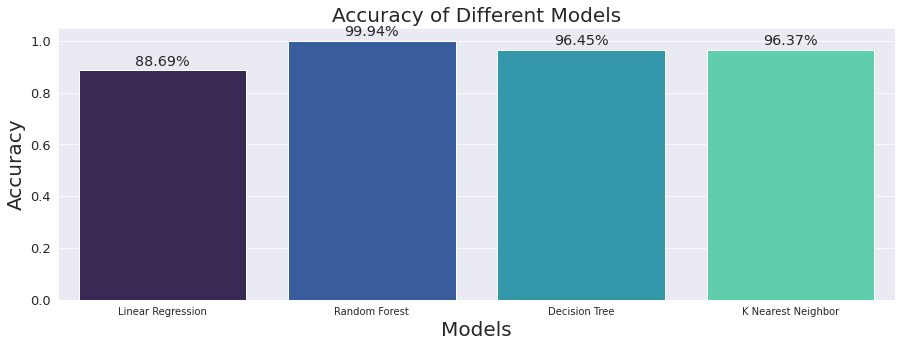

In [63]:
mylist=[]
mylist2=[]
mylist.append(LR_test_accuracy)
mylist2.append("Linear Regression",)
mylist.append(RF_test_accuracy)
mylist2.append("Random Forest",)
mylist.append(DT_test_accuracy)
mylist2.append("Decision Tree")
mylist.append(KNN_test_accuracy)
mylist2.append("K Nearest Neighbor")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of Different Models", fontsize = 20)
# plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [64]:
# ERRORS
data = {"Model": ["Linear Regression", "Random Forest","Decision Tree", "K Nearest Neighbor"], 
        "MSE": [LR_MSE, RF_MSE, DT_MSE, KNN_MSE],         
        "RMSE": [LR_RMSE, RF_RMSE, DT_RMSE, KNN_RMSE],
        "MAE": [LR_MAE,RF_MAE, DT_MAE, KNN_MAE],
        "R2": [LR_MAE,RF_MAE, DT_MAE, KNN_MAE]}

results = pd.DataFrame(data=data)
results

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,6846.411828,82.743047,48.934705,48.934705
1,Random Forest,35.824803,5.985382,0.964724,0.964724
2,Decision Tree,2149.908824,46.367109,27.464740,27.464740
3,K Nearest Neighbor,2198.994483,46.893438,13.425674,13.425674



**CONCLUSION :**

From all the above result we can conclude that the best algorithm is the Random Forest Algorithm for this project because it has higher accuracy and low Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and a good R-squared score compared to other algorithms.